# State of San Diego Infrastructure
##### COGS 108 Final Project by : Anaelle Kim, Grant Sheagley, Dylan Christiano, Shawn Le

#### Preface: Unsafe roads have been hazardous for 


In [1]:
# Imports: Tools we will need to use for cleaning and analysis of question
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re 
import difflib 

## Section 1: Loading and Cleaning the Data

In [2]:
col_name = ["COLLISION_DATE","COLLISION_TIME","PRIMARY_RD","SECONDARY_RD","CHP_BEAT_TYPE","WEATHER_1","COLLISION_SEVERITY","PRIMARY_COLL_FACTOR","PCF_VIOL_CATEGORY","LIGHTING","ROAD_SURFACE","ROAD_COND_1"]
MVA_DF = pd.DataFrame(data=None, index=None, columns=col_name, dtype=None) #New empty dataframe
size = 0
for i in range (1):
    year = 2015 #File name
    DF = pd.read_csv('CollisionRecords_%i.csv' % year,sep = '\t', dtype='unicode') #Read the csv file
    DF = DF[col_name]
    size += len(DF) #Check size matches 
    MVA_DF = MVA_DF.append(DF)#Add DF to our initialized dataframe

print(size) # Checking Size

10075


In [3]:
year = 2011 #Only OCI file that I have 
DF_OCI = pd.read_csv('OCI_SD_%i.csv' % year,sep = ',', dtype='unicode') #Read the csv file
DF_OCI= DF_OCI[['oci','street','street_from','street_to','oci_desc']] #Keep only relevant variables
DF_OCI

,oci,street,street_from,street_to,oci_desc
0,49.23,TEBO CT,PICADOR BL,ROBB ROY PL,Fair
1,35.32,04TH AV,K ST,J ST,Poor
2,78.48,MELBOURNE DR,SHAWN AV,IRVINGTON AV,Good
3,34.29,BAYARD ST,REED AV,THOMAS AV,Poor
4,28.28,QUINCE DR,06TH AV,QUINCE ST,Poor
5,75.72,PRINCESS ST,SPINDRIFT DR,CITY BOUNDARY,Good
6,83.43,CLAVELITA ST,ARLISS CT,DEL SUR BL,Good
7,100,IRIS AV,ALBATA CT,ROCHDALE LN,Good
8,51.55,ARLISS CT,CLAVELITA ST,END,Fair
9,45.26,K ST,19TH ST,20TH ST,Fair


In [4]:
#Function to aply multiple conditions/regexp on string
def multiple_replace(dico, name_street):
  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dico.keys())))

  # For each match, look-up corresponding value in dictionary
  return (regex.sub(lambda mo: dico[mo.string[mo.start():mo.end()]], name_street) )

In [5]:
#MVA_DF put the street names in the closest format from the OCI dataset

pattern_digitAV = re.compile("^(^[0-9])([A-Z].*)") #If start with one digit and followed by str
dico = {"HWY" : "HY", "RT " : "I-","INTERSTATE ": "I-","STATE ROUTE ": "ST-"} 
for i in range(len(MVA_DF)) : #When finished, len(DF)
    #print("ONE  : ",(MVA_DF["PRIMARY_RD"])[i]," Intersection : ",(MVA_DF["SECONDARY_RD"])[i])
    (MVA_DF["PRIMARY_RD"])[i] = multiple_replace(dico,(MVA_DF["PRIMARY_RD"])[i]) #Get the street name
    (MVA_DF["SECONDARY_RD"])[i] = multiple_replace(dico,(MVA_DF["SECONDARY_RD"])[i]) #Get intersection 
    digit_AV_street = pattern_digitAV.match((MVA_DF["PRIMARY_RD"])[i]) # Check if match with pattern
    digit_AV_Inter =pattern_digitAV.match((MVA_DF["SECONDARY_RD"])[i]) # Check if match with pattern
    if digit_AV_Inter is not None : 
        (MVA_DF["SECONDARY_RD"])[i]= "0" + digit_AV_Inter.group()    #Add a 0 in front if match
    if digit_AV_street is not (None):
        (MVA_DF["PRIMARY_RD"])[i] = "0" + digit_AV_street.group() #Add a 0 in front if match
        
MVA_DF = MVA_DF.loc[MVA_DF.PCF_VIOL_CATEGORY != '1'] #If driving under drugs or alcohol
MVA_DF = MVA_DF[~(MVA_DF.PRIMARY_RD.str.startswith('I-'))] #Take off the accidents owhen on the main Interstates road but not if at intersection
MVA_DF = MVA_DF[~(MVA_DF.PRIMARY_RD.str.startswith('SR-'))] #Take off the accidents on State Routes (not in OCI df)

MVA_DF= MVA_DF.reset_index(drop=True)
MVA_DF

,COLLISION_DATE,COLLISION_TIME,PRIMARY_RD,SECONDARY_RD,CHP_BEAT_TYPE,WEATHER_1,COLLISION_SEVERITY,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,LIGHTING,ROAD_SURFACE,ROAD_COND_1
0,20150424,2235,01ST AV,W JUNIPER ST,0,B,1,A,3,C,B,H
1,20150428,2008,SEA WORLD DR,MISSION BAY DR,0,A,1,A,11,E,A,H
2,20150430,1418,DEL MAR TRAILS RD,MONA LISA ST,0,A,1,A,10,A,A,H
3,20150714,1831,GRAMERCY DR,TOWSER ST,0,A,1,A,8,A,A,H
4,20150629,2145,SOUTH 32ND ST,S 32ND ST 500,0,A,1,A,3,C,A,H
5,20150715,2129,INGRAHAM ST,DANA LANDING RD,0,A,1,A,11,C,A,H
6,20150813,1823,NAVAJO RD,GOLFCREST DR,0,A,1,A,12,A,A,H
7,20150822,730,FRIARS RD,PACIFIC HY,0,A,1,A,8,A,A,H
8,20150831,1726,GRAND AV,DAWES ST,0,A,1,A,10,A,A,H
9,20150830,1608,CARMEL MOUNTAIN RD,CARMEL CREEK RD,0,A,1,A,3,A,A,H


In [6]:
#To be changed - Instead of looping wanted to merge on street name but don't think its possible - So we should make multiple conditions for determining if street + intersection corresponds to the right OCI
#If we have info on To or From  - look directly into the right street-to or street_from - 
#Otherwise, if double answers, check if same OCI_desc - if same just add it - Otherwise should we include it or just exclude these cases ? 

TEMP = pd.DataFrame(data=None, index=None, columns= None, dtype=None) #New empty dataframe
TEMP2 = pd.DataFrame(data=None, index=None, columns= None, dtype=None) #New empty dataframe
DF = pd.DataFrame(data=None, index=None, columns= None, dtype=None) #New empty dataframe
street_len = 0
intersection_len = 0

for i in range(400) : 
    street_name = (MVA_DF["PRIMARY_RD"])[i]
    intersection = (MVA_DF["SECONDARY_RD"])[i]
    
    TEMP = DF_OCI.loc[(DF_OCI['street'].str.contains(street_name))]
    
    if TEMP.empty:
        Close_Match_Street = (difflib.get_close_matches(street_name, (DF_OCI['street']),n=1))
        print("Close_M_S : ", Close_Match_Street)
        if (Close_Match_Street != []) : 
            TEMP = DF_OCI.loc[DF_OCI['street'].str.contains(Close_Match_Street[0])]
        else :
            print("No street match")
            print("Street : ",street_name," Intersection : ",intersection)
            street_len = street_len +1
            
    else :
        TEMP2 = TEMP.loc[(TEMP['street_from'] == intersection)|(TEMP['street_to']==(intersection))]  
        if TEMP2.empty : 
            Close_Match_Intersection = (difflib.get_close_matches(intersection, (TEMP['street_from']),n=1))
            Close_Match_To = (difflib.get_close_matches(intersection, (TEMP['street_to']),n=1))
            if (Close_Match_Intersection != []) & (Close_Match_To != []) : 
                TEMP2 = TEMP.loc[(TEMP['street_from'] == Close_Match_Intersection[0])|(TEMP['street_to']== Close_Match_To[0])]
            elif (Close_Match_Intersection != []) : 
                TEMP2 = TEMP.loc[(TEMP['street_from'] == Close_Match_Intersection[0])]
            elif (Close_Match_To != []) : 
                TEMP2 = TEMP.loc[(TEMP['street_to'] == Close_Match_To[0])]
            else : 
                print("No street_from match")
                print("Street : ",street_name," Intersection : ",intersection)
                intersection_len = intersection_len +1
                
        
        TEMP2= TEMP2.reset_index(drop=True)
        length = len(TEMP2)
        if length ==1 :
            DF = DF.append(TEMP2)
        elif length ==2 : 
            if (TEMP2['oci_desc'])[0] == (TEMP2['oci_desc'])[1]:
                DF = DF.append(TEMP2.loc[[1]])
        elif length >2 :
            print("CAS A DETERMINER")
  

CAS A DETERMINER
Close_M_S :  ['S 32ND ST']
Close_M_S :  ['CARMEL MTN RD']
No street_from match
Street :  GENESEE AV  Intersection :  CENTURION SQ
Close_M_S :  ['CLAIREMONT DR']
Close_M_S :  ['OTAY MESA RD']
Close_M_S :  ['CAM DE LA PLAZA']
Close_M_S :  ['PAMO AV']
Close_M_S :  ['OCEAN VIEW BL']
Close_M_S :  ['BLACK MTN RD']
No street_from match
Street :  CABLE ST  Intersection :  CABLE ST 1783
Close_M_S :  ['LA JOLLA PY']
No street_from match
Street :  BERNARDO CENTER DR  Intersection :  I-15
Close_M_S :  ['E SAN YSIDRO BL']
Close_M_S :  ['BLACK MTN RD']
Close_M_S :  ['GRIBBLE ST']
Close_M_S :  ['PAMO AV']
No street_from match
Street :  HOWARD AV  Intersection :  SAN YSIDRO BL
Close_M_S :  ['CARMEL MTN RD']
CAS A DETERMINER
No street_from match
Street :  58TH ST  Intersection :  58TH ST 4000
Close_M_S :  ['LA JOLLA SCENIC S DR']
Close_M_S :  ['CAM DE LA REINA']
CAS A DETERMINER
No street_from match
Street :  UNIVERSITY AV  Intersection :  UNIVERSITY AV 5000
Close_M_S :  ['TED WILLIAMS

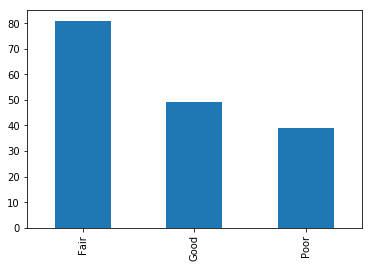

,oci,street,street_from,street_to,oci_desc
0,80.26,01ST AV,IVY ST,JUNIPER ST,Good
1,76.33,GRAMERCY DR,GREYLING DR,TOWSER ST,Good
2,68.95,GRAND AV,DAWES ST,EVERTS ST,Fair
3,52.59,EL CAJON BL,ALTADENA AV,51ST ST,Fair
4,83.16,RANCHO BERNARDO RD,BERNARDO CENTER DR,ACENA DR,Good
5,60.58,DEL SOL BL,BEYER WY,DEL SOL LN,Fair
6,80,RICHMOND ST,ESSEX ST,UNIVERSITY AV,Good
7,55.99,UNIVERSITY AV,MENLO AV,47TH ST,Fair
8,39,BACON ST,CORONADO AV,SANTA CRUZ AV,Poor
9,59.62,MIRAMAR RD,MIRAMAR ML,MIRAMAR PL,Fair


In [7]:
DF= DF.reset_index(drop=True)
#DF
#print(street_len,intersection_len)
#DF2= DF.oci_desc.cumsum()
plt.figure()
#test = count()
DF.oci_desc.value_counts().plot(kind='bar') #far from good model but just to have an idea
plt.show()
DF

## Section 2: Preliminary Data Analytics

In [37]:
DF.head()

,oci,street,street_from,street_to,oci_desc
0,80.26,01ST AV,IVY ST,JUNIPER ST,Good
1,76.33,GRAMERCY DR,GREYLING DR,TOWSER ST,Good
2,68.95,GRAND AV,DAWES ST,EVERTS ST,Fair
3,52.59,EL CAJON BL,ALTADENA AV,51ST ST,Fair
4,83.16,RANCHO BERNARDO RD,BERNARDO CENTER DR,ACENA DR,Good


## Section 3: Data Analysis

In [67]:
good_oci = DF.loc[DF['oci_desc'] == 'Good']
fair_oci = DF.loc[DF['oci_desc'] == 'Fair']
poor_oci = DF.loc[DF['oci_desc'] == 'Poor']

## Section 4: Discussion & Remarks